**Необходимо вычислить количество бревен и труб на изображениях.**

In [14]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def apply_hough_circles(img, dp, minDist, param1, param2, minRadius, maxRadius, method=cv.HOUGH_GRADIENT):
    circles = cv.HoughCircles(
        img,
        method,
        dp,  # Inverse ratio of the accumulator resolution to the image resolution
        minDist, # Minimum distance between the centers of the detected circles
        param1=param1, # The higher threshold of the two passed to the Canny edge detector
        param2=param2,  # The accumulator threshold for the circle centers at the detection stage
        minRadius=minRadius,
        maxRadius=maxRadius
    )
    return circles


def plot_circles(image, circles):
    if circles is not None:
        circles = np.uint16(np.around(circles)) # Convert circle metadata to integers
        for i in circles[0, :]:
            # draw the outer circle
            cv.circle(image, (i[0], i[1]), i[2], (255, 0, 0), 2)
            # draw the center of the circle
            cv.circle(image, (i[0], i[1]), 1, (0, 255, 0), 3)
    n_circles = circles.shape[1] if circles is not None else 0
    plt.imshow(image)
    plt.title(f"{n_circles} circles found")
    plt.show()

# logs-1

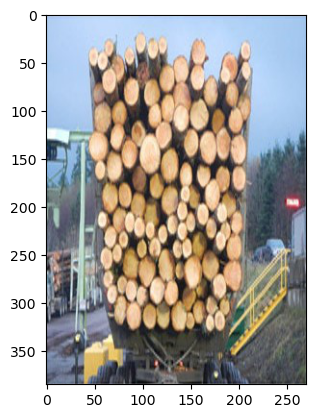

In [16]:
src = cv.imread("./data/logs-1.jpg")
src = cv.cvtColor(src, cv.COLOR_BGR2RGB)
plt.imshow(src)

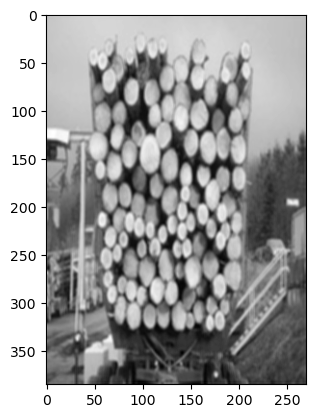

In [17]:
gray = cv.cvtColor(src, cv.COLOR_RGB2GRAY)
gray = cv.blur(gray, (3, 3)) # Apply blur with a 3x3 kernel
plt.imshow(gray, 'gray')

In [18]:
detected_circles = apply_hough_circles(
    gray,
    dp=1,  # Inverse ratio of the accumulator resolution to the image resolution
    minDist=15, # Minimum distance between the centers of the detected circles
    param1=200, # The higher threshold of the two passed to the Canny edge detector
    param2=15,  # The accumulator threshold for the circle centers at the detection stage
    minRadius = 0, 
    maxRadius = 20,
)

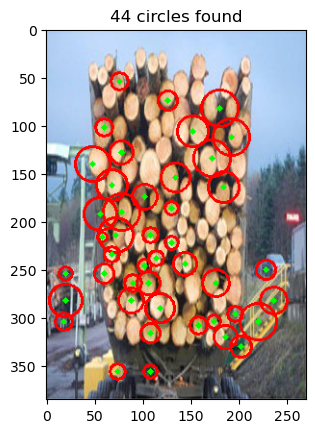

In [19]:
image = src.copy()
plot_circles(image, detected_circles)

Тут никакие параметры не позволяют найти достаточное количество бревен

Попробуем изменить размер изображения и вырезать нужную область

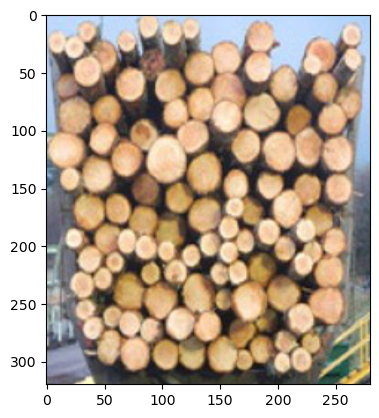

In [20]:
src = cv.imread("./data/logs-1.jpg")
src = cv.cvtColor(src, cv.COLOR_BGR2RGB)
src = cv.resize(src, (max(src.shape)+50, max(src.shape)))
src = src[20:340, 70:350]
plt.imshow(src)

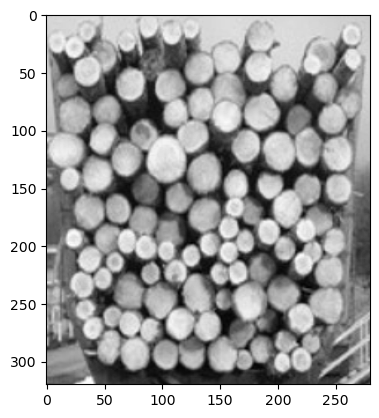

In [21]:
gray = cv.cvtColor(src, cv.COLOR_RGB2GRAY)
# gray = cv.blur(gray, (3, 3)) # Apply blur with a 3x3 kernel
plt.imshow(gray, 'gray')

In [44]:
detected_circles = apply_hough_circles(
    gray,
    1,  # Inverse ratio of the accumulator resolution to the image resolution
    15, # Minimum distance between the centers of the detected circles
    param1=200, # The higher threshold of the two passed to the Canny edge detector
    param2=15,  # The accumulator threshold for the circle centers at the detection stage
    minRadius=5,
    maxRadius=19
)

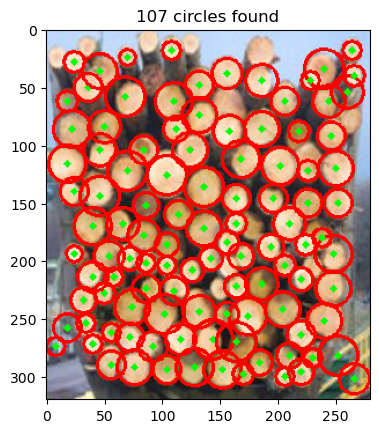

In [45]:
image = src.copy()
plot_circles(image, detected_circles)

# logs-2

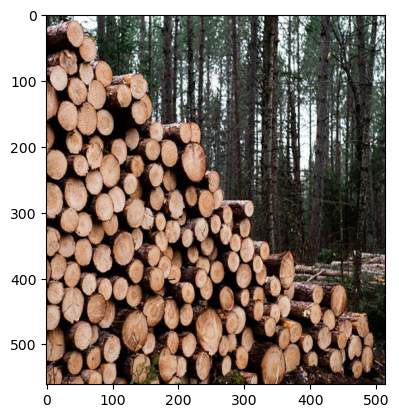

In [46]:
src = cv.imread("./data/logs-2.jpg")
src = cv.cvtColor(src, cv.COLOR_BGR2RGB)
plt.imshow(src)

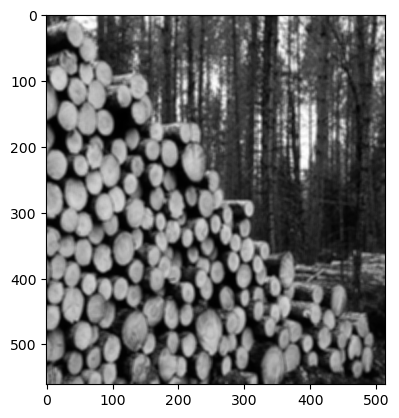

In [67]:
gray = cv.cvtColor(src, cv.COLOR_RGB2GRAY)
gray = cv.blur(gray, (5, 5))
plt.imshow(gray, 'gray')

In [72]:
detected_circles = apply_hough_circles(
    gray,
    dp=1.0,  # Inverse ratio of the accumulator resolution to the image resolution
    minDist=20, # Minimum distance between the centers of the detected circles
    param1=300, # The higher threshold of the two passed to the Canny edge detector
    param2=15,  # The accumulator threshold for the circle centers at the detection stage
    minRadius=0, 
    maxRadius=30,
)

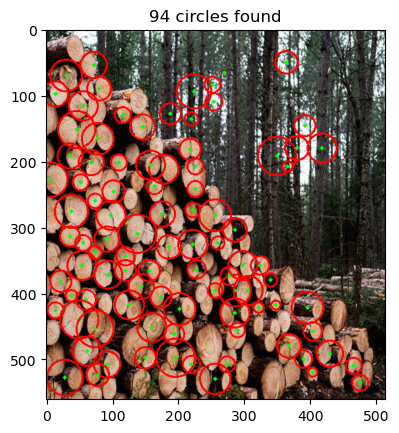

In [73]:
image = src.copy()
plot_circles(image, detected_circles)

Проблемное изображение...

# pipes-4

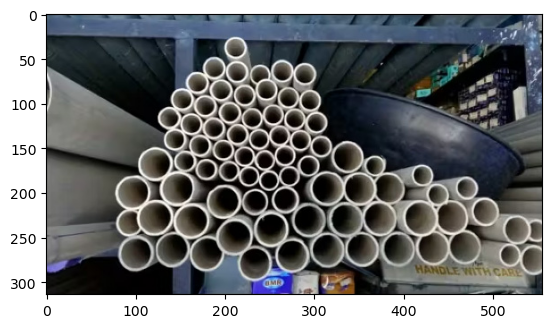

In [312]:
src = cv.imread("./data/pipes-4.jpg")
src = cv.cvtColor(src, cv.COLOR_BGR2RGB)
plt.imshow(src)

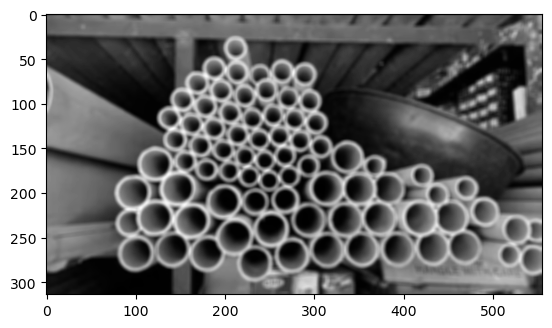

In [313]:
gray = cv.cvtColor(src, cv.COLOR_RGB2GRAY)
gray = cv.blur(gray, (5, 5))
plt.imshow(gray, 'gray')

In [330]:
detected_circles = apply_hough_circles(
    gray,
    dp=1.0,  # Inverse ratio of the accumulator resolution to the image resolution
    minDist=20, # Minimum distance between the centers of the detected circles
    param1=200, # The higher threshold of the two passed to the Canny edge detector
    param2=20,  # The accumulator threshold for the circle centers at the detection stage
    minRadius=0, 
    maxRadius=20,
)

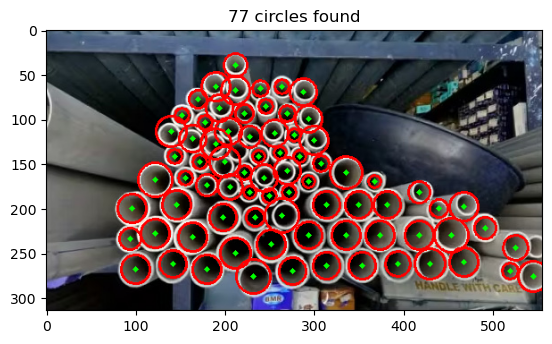

In [331]:
image = src.copy()
plot_circles(image, detected_circles)

Потерялись 2 круга

# pipes-5

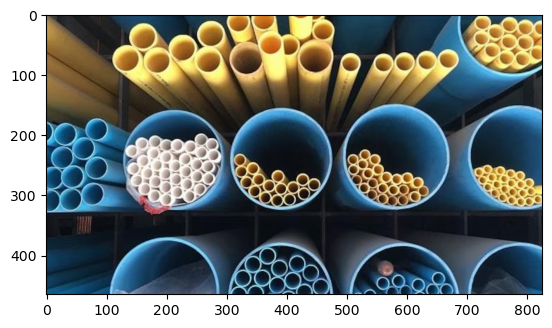

In [491]:
src = cv.imread("./data/pipes-5.jpg")
src = cv.cvtColor(src, cv.COLOR_BGR2RGB)
plt.imshow(src)

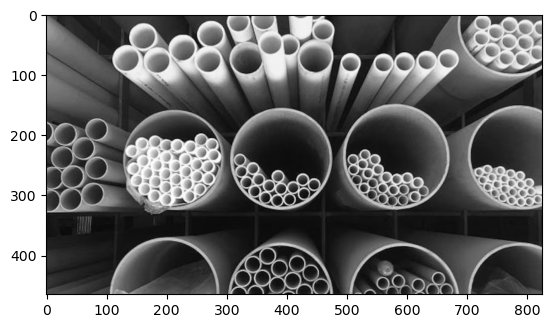

In [492]:
gray = cv.cvtColor(src, cv.COLOR_RGB2GRAY)
# gray = cv.blur(gray, (5, 5))
plt.imshow(gray, 'gray')

Сначала найдем маленькие круги

In [493]:
small_circles = apply_hough_circles(
    gray,
    dp=1.0,  # Inverse ratio of the accumulator resolution to the image resolution
    minDist=5, # Minimum distance between the centers of the detected circles
    param1=250, # The higher threshold of the two passed to the Canny edge detector
    param2=15,  # The accumulator threshold for the circle centers at the detection stage
    minRadius=0, 
    maxRadius=12,
)

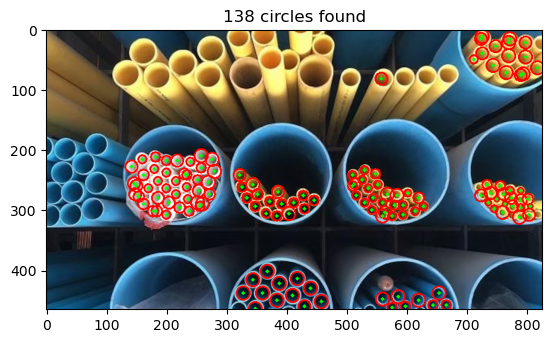

In [494]:
image = src.copy()
plot_circles(image, small_circles)

Теперь средние

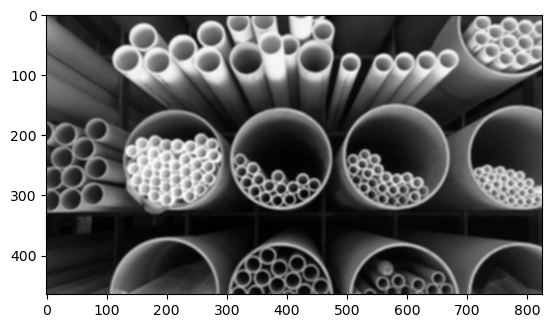

In [495]:
gray = cv.cvtColor(src, cv.COLOR_RGB2GRAY)
gray = cv.blur(gray, (5, 5))
plt.imshow(gray, 'gray')

In [496]:
middle_circles = apply_hough_circles(
    gray,
    dp=1.0,  # Inverse ratio of the accumulator resolution to the image resolution
    minDist=20, # Minimum distance between the centers of the detected circles
    param1=250, # The higher threshold of the two passed to the Canny edge detector
    param2=19,  # The accumulator threshold for the circle centers at the detection stage
    minRadius=17, 
    maxRadius=30,
)

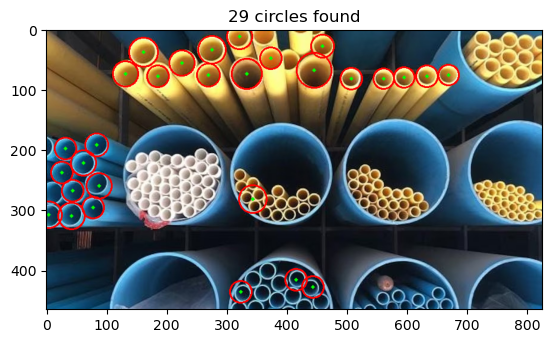

In [497]:
image = src.copy()
plot_circles(image, middle_circles)

И большие

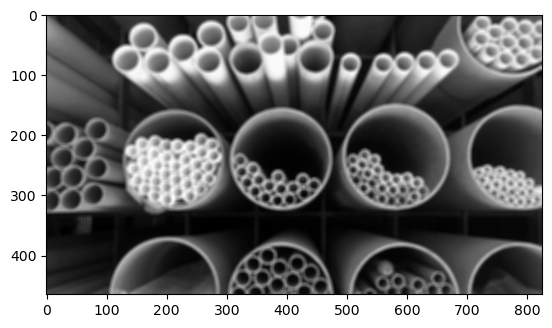

In [498]:
gray = cv.cvtColor(src, cv.COLOR_RGB2GRAY)
gray = cv.blur(gray, (7, 7))
plt.imshow(gray, 'gray')

In [499]:
big_circles = apply_hough_circles(
    gray,
    dp=1.0,  # Inverse ratio of the accumulator resolution to the image resolution
    minDist=150, # Minimum distance between the centers of the detected circles
    param1=200, # The higher threshold of the two passed to the Canny edge detector
    param2=28,  # The accumulator threshold for the circle centers at the detection stage
    minRadius=30, 
    maxRadius=90,
)

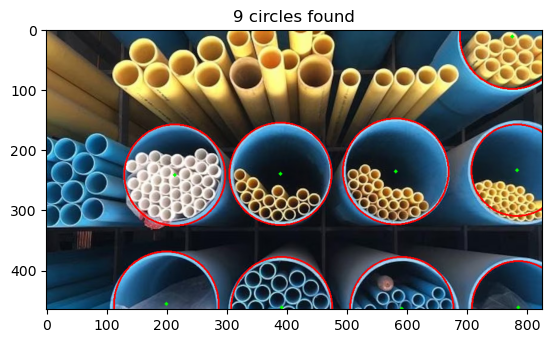

In [500]:
image = src.copy()
plot_circles(image, big_circles)

In [502]:
big_circles.shape, small_circles.shape, middle_circles.shape

((1, 9, 3), (1, 138, 3), (1, 29, 3))

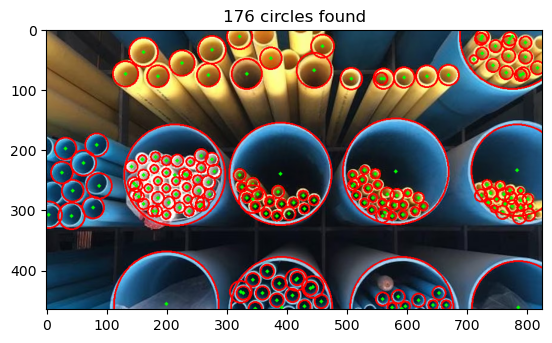

In [504]:
allsize_circles = np.concatenate((small_circles, middle_circles, big_circles), axis=1)
image = src.copy()
plot_circles(src, allsize_circles)

# pipes-6

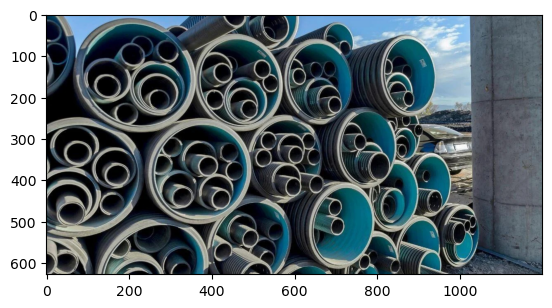

In [612]:
src = cv.imread("./data/pipes-6.jpg")
src = cv.cvtColor(src, cv.COLOR_BGR2RGB)
plt.imshow(src)

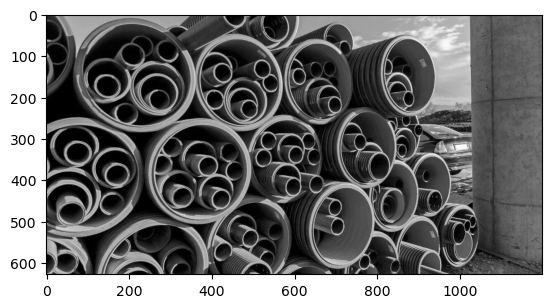

In [613]:
gray = cv.cvtColor(src, cv.COLOR_RGB2GRAY)
# gray = cv.blur(gray, (5, 5))
plt.imshow(gray, 'gray')

Сначала найдем маленькие круги

In [614]:
small_circles = apply_hough_circles(
    gray,
    dp=1.0,  # Inverse ratio of the accumulator resolution to the image resolution
    minDist=25, # Minimum distance between the centers of the detected circles
    param1=250, # The higher threshold of the two passed to the Canny edge detector
    param2=25,  # The accumulator threshold for the circle centers at the detection stage
    minRadius=15, 
    maxRadius=30,
)

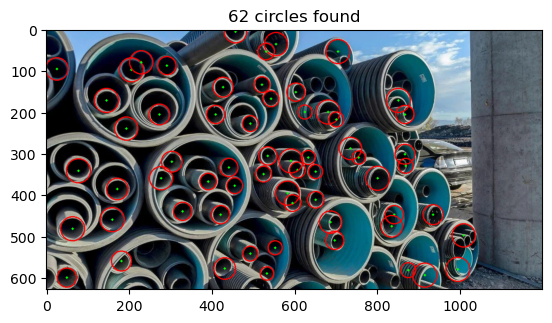

In [615]:
image = src.copy()
plot_circles(image, small_circles)

Теперь средние

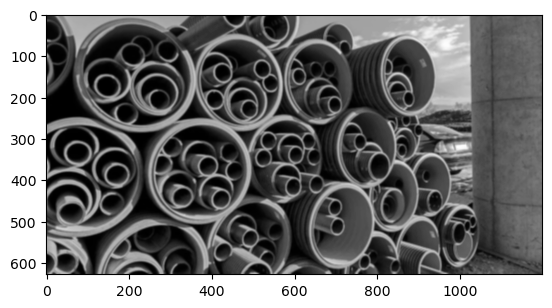

In [616]:
gray = cv.cvtColor(src, cv.COLOR_RGB2GRAY)
gray = cv.blur(gray, (5, 5))
plt.imshow(gray, 'gray')

In [617]:
middle_circles = apply_hough_circles(
    gray,
    dp=1.0,  # Inverse ratio of the accumulator resolution to the image resolution
    minDist=50, # Minimum distance between the centers of the detected circles
    param1=300, # The higher threshold of the two passed to the Canny edge detector
    param2=30,  # The accumulator threshold for the circle centers at the detection stage
    minRadius=40, 
    maxRadius=60,
)

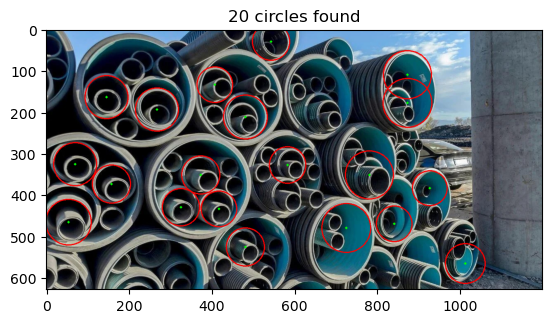

In [618]:
image = src.copy()
plot_circles(image, middle_circles)

И большие

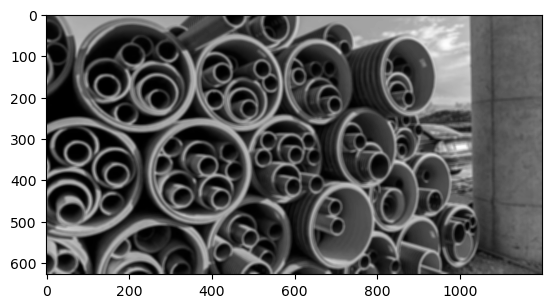

In [619]:
gray = cv.cvtColor(src, cv.COLOR_RGB2GRAY)
gray = cv.blur(gray, (7, 7))
plt.imshow(gray, 'gray')

In [620]:
big_circles = apply_hough_circles(
    gray,
    dp=1.0,  # Inverse ratio of the accumulator resolution to the image resolution
    minDist=80, # Minimum distance between the centers of the detected circles
    param1=200, # The higher threshold of the two passed to the Canny edge detector
    param2=30,  # The accumulator threshold for the circle centers at the detection stage
    minRadius=70, 
    maxRadius=120,
)

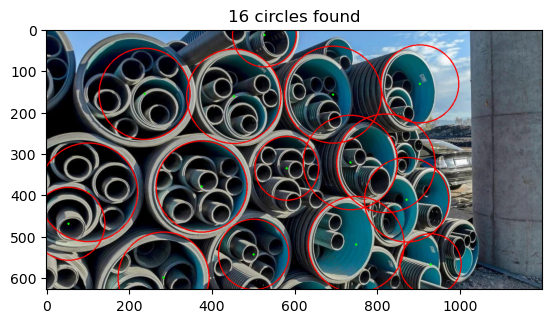

In [621]:
image = src.copy()
plot_circles(image, big_circles)

In [622]:
big_circles.shape, small_circles.shape, middle_circles.shape

((1, 16, 3), (1, 62, 3), (1, 20, 3))

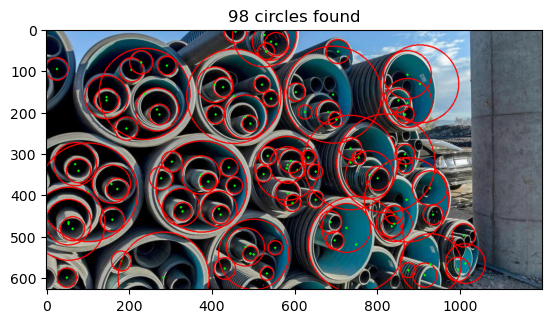

In [623]:
allsize_circles = np.concatenate((small_circles, middle_circles, big_circles), axis=1)
image = src.copy()
plot_circles(src, allsize_circles)